In [1]:
from repositories import retrieve_metadata
from assess import assess

/Users/anadrmic/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
keywords=["Parkinson", "homo sapiens", "frontal lobe"]
repository_choice="1"

Fetching ArrayExpress metadata...
Fetching metadata with keywords: ['Parkinson', 'homo sapiens', 'frontal lobe']
API Call: https://www.ebi.ac.uk/biostudies/api/v1/search?query=Parkinson+AND+homo+sapiens+AND+frontal+lobe&pageSize=100
Total Study IDs retrieved: 5
API Call: https://www.ebi.ac.uk/biostudies/api/v1/studies/E-MTAB-1194
API Call: https://www.ebi.ac.uk/biostudies/api/v1/studies/E-GEOD-8397
API Call: https://www.ebi.ac.uk/biostudies/api/v1/studies/E-GEOD-7307
API Call: https://www.ebi.ac.uk/biostudies/api/v1/studies/E-MTAB-2325
API Call: https://www.ebi.ac.uk/biostudies/api/v1/studies/E-MTAB-3732
______________________________________________________________________________________________________________
Principle: F1
Description: Findability: DOI presence in webpage
Score: 1
Explanation: The data source has a valid DOI associated with it available at re3data: ['10.25504/FAIRsharing.6k0kwd', '10.17616/R3302G', '10.17616/R3D'].
__________________________________________________

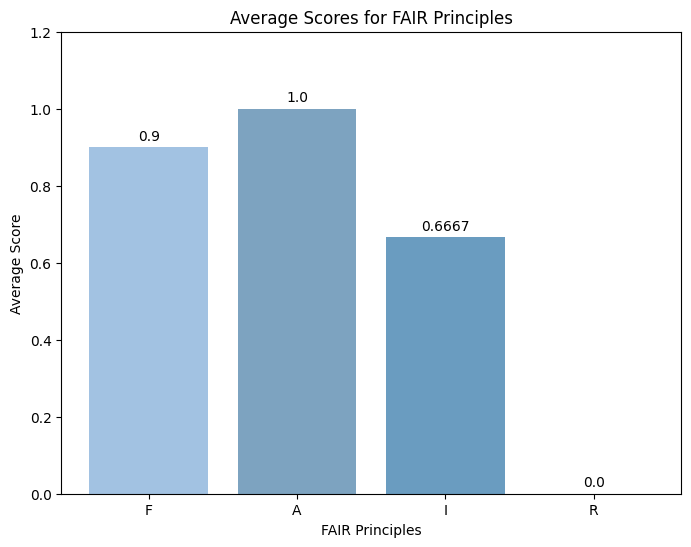

In [3]:
metadata_list, request_status, url = retrieve_metadata(repository_choice, keywords)
scores = assess(metadata_list, keywords, repository_choice, url, request_status)